In [1]:
!pip install opendatasets

# load

In [2]:
import opendatasets as od
import os

In [3]:
cd C:\Users\ASUS RYZEN\AnacondaJupyter\Skripsi

C:\Users\ASUS RYZEN\AnacondaJupyter\Skripsi


In [4]:
'''!pip install split-folders
'''

'!pip install split-folders\n'

In [5]:
'''import splitfolders
splitfolders.ratio('C:/Users/ASUS RYZEN/AnacondaJupyter/MachineLearning_Theory/cat2dog/cat2dog', output = 
                   'C:/Users/ASUS RYZEN/AnacondaJupyter/MachineLearning_Theory/fix_data', 
                   seed = 42, ratio = (0.7, 0.3), group_prefix = None)'''

"import splitfolders\nsplitfolders.ratio('C:/Users/ASUS RYZEN/AnacondaJupyter/MachineLearning_Theory/cat2dog/cat2dog', output = \n                   'C:/Users/ASUS RYZEN/AnacondaJupyter/MachineLearning_Theory/fix_data', \n                   seed = 42, ratio = (0.7, 0.3), group_prefix = None)"

In [6]:
#Define a path
base_dir = 'C:/Users/ASUS RYZEN/AnacondaJupyter/MachineLearning_Theory/cat2dog/cat2dog'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

train_cat_dir = os.path.join(train_dir, 'Cat')
train_dog_dir = os.path.join(train_dir, 'Dog')

test_cat_dir = os.path.join(test_dir, 'Cat')
test_dog_dir = os.path.join(test_dir, 'Dog')


In [7]:
print('Train_cat_dir :', os.listdir(train_cat_dir)[0:2])
print('Train_dog_dir :', os.listdir(train_dog_dir)[0:2])
print('Test_cat_dir :', os.listdir(test_cat_dir)[0:2])
print('Test_dog_dir :', os.listdir(test_dog_dir)[0:2])

Train_cat_dir : ['0.jpg', '1.jpg']
Train_dog_dir : ['0.jpg', '1.jpg']
Test_cat_dir : ['103.jpg', '104.jpg']
Test_dog_dir : ['1092.jpg', '1095.jpg']


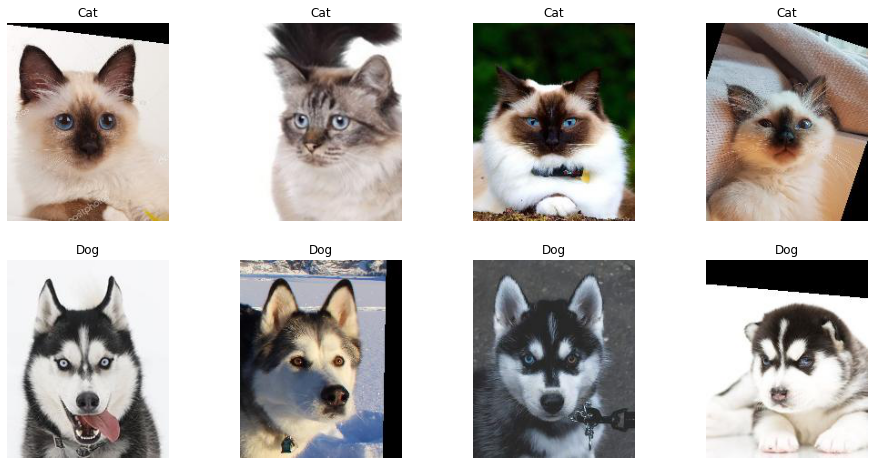

In [8]:
# Tampilkan 8 image per kelas dengan ukuran 4x4 

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 2
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches( ncols * 4,nrows * 4)

pic_index += 8
Train_cat = [os.path.join(train_cat_dir, fname) 
                for fname in os.listdir(train_cat_dir)[pic_index-4:pic_index]]

Train_dog = [os.path.join(train_dog_dir, fname) 
                for fname in os.listdir(train_dog_dir)[pic_index-4:pic_index]]
for i, img_path in enumerate(Train_cat+Train_dog):
    
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.title(img_path.split(os.path.sep)[-2])

plt.show()

# Preprocessing

In [9]:
'''import cv2
import numpy as np
'''

'import cv2\nimport numpy as np\n'

In [10]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


Found 2035 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


# Modelling CNN

In [15]:
# Feature Extraction Layer
# Model 1
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, AveragePooling2D, GlobalMaxPooling2D,  GlobalAveragePooling2D
#proses pembuatan model dengan sequential
model = Sequential()

model.add(InputLayer(input_shape=[150,150,3]))
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(GlobalMaxPooling2D())
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 38, 38, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 38, 38, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
global_max_pooling2d_2 (Glob (None, 64)               

In [16]:
#from tensorflow.keras import models
H = model.fit(train_generator,
              steps_per_epoch=102,  # images = batch_size * steps
              epochs=20,
              validation_data=test_generator,
              validation_steps=10)

Epoch 1/20
102/102 [==============================] - 73s 682ms/step - loss: 0.6575 - acc: 0.6241 - val_loss: 0.4336 - val_acc: 0.8050
Epoch 2/20
102/102 [==============================] - 38s 376ms/step - loss: 0.4105 - acc: 0.8169 - val_loss: 0.3867 - val_acc: 0.8100
Epoch 3/20
102/102 [==============================] - 39s 380ms/step - loss: 0.2374 - acc: 0.8983 - val_loss: 0.2240 - val_acc: 0.9400
Epoch 4/20
102/102 [==============================] - 39s 387ms/step - loss: 0.2413 - acc: 0.8980 - val_loss: 0.1901 - val_acc: 0.9400
Epoch 5/20
102/102 [==============================] - 39s 379ms/step - loss: 0.1929 - acc: 0.9178 - val_loss: 0.1821 - val_acc: 0.9450
Epoch 6/20
102/102 [==============================] - 40s 392ms/step - loss: 0.1778 - acc: 0.9316 - val_loss: 0.2242 - val_acc: 0.9400
Epoch 7/20
102/102 [==============================] - 39s 384ms/step - loss: 0.1568 - acc: 0.9375 - val_loss: 0.1781 - val_acc: 0.9450
Epoch 8/20
102/102 [==============================] - 5

# Model Evaluation

In [17]:
print(H.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


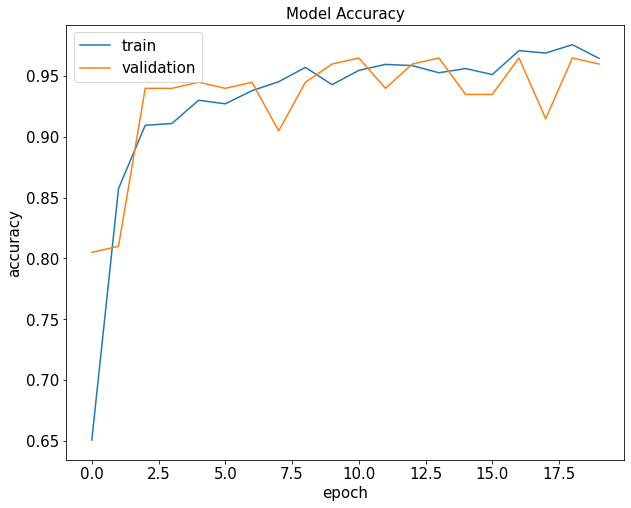

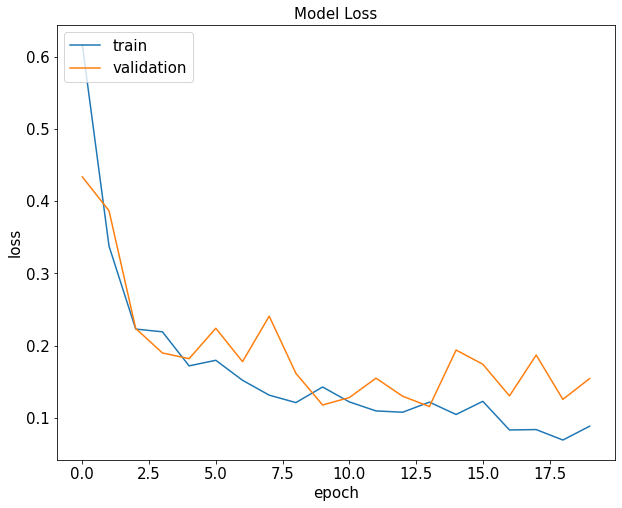

In [18]:
# summarize history for accuracy
plt.figure(figsize = (10,8))
plt.xticks(fontsize='15')
plt.yticks(fontsize='15') 
plt.plot(H.history['acc'])
plt.plot(H.history['val_acc'])
plt.title('Model Accuracy', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('epoch', fontsize=15)
plt.legend(['train', 'validation'], loc='upper left', fontsize=15)
plt.show()

plt.figure(figsize = (10,8))
plt.xticks(fontsize='15')
plt.yticks(fontsize='15') 
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('Model Loss', fontsize=15)
plt.ylabel('loss', fontsize=15)
plt.xlabel('epoch', fontsize=15)
plt.legend(['train', 'validation'], loc='upper left', fontsize=15)
plt.show()

In [19]:
#Get the accuracy score
test_score = model.evaluate_generator(test_generator, 20)

print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 

print("[INFO] Loss: ",test_score[0])

C:\Users\ASUS RYZEN\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[INFO] accuracy: 96.00%
[INFO] Loss:  0.15466557443141937


In [20]:
#Print the Target names
target_names = []
for key in train_generator.class_indices:
    target_names.append(key)
print(target_names)

['Cat', 'Dog']


In [21]:
height=150; width=150
batch_size=20

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size=batch_size,                                                             
                                                  target_size=(height, width),
                                                  class_mode= None,
                                                  shuffle=False
                                                  )

Found 200 images belonging to 2 classes.


In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

In [23]:
predictions = model.predict_generator(generator=test_generator)
test_pred = predictions > 0.5
y_test = test_generator.classes
cm = confusion_matrix(y_test, test_pred)

C:\Users\ASUS RYZEN\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


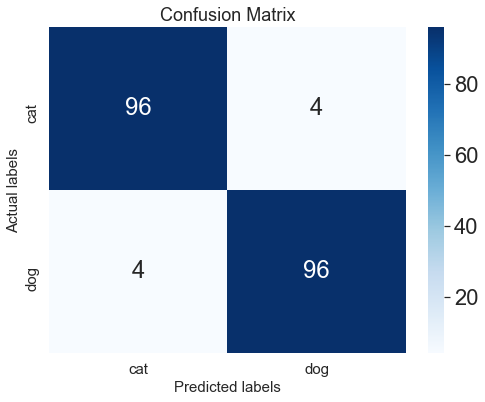

In [29]:
class_names = test_generator.class_indices
Cmatrix_test = confusion_matrix(test_generator.classes, test_pred)
plt.figure(figsize = (8,6))
ax = plt.subplot()
sns.set(font_scale=2.0) # Adjust to fit
cm_reshape = np.asarray(Cmatrix_test).reshape(2,2)
sns.heatmap(cm_reshape, annot=True, ax=ax, cmap="Blues", fmt="g");  

# Labels, title and ticks
label_font = {'size':'15'}  # Adjust to fit
ax.set_xlabel('Predicted labels', fontdict=label_font);
ax.set_ylabel('Actual labels', fontdict=label_font);

title_font = {'size':'18'}  # Adjust to fit
ax.set_title('Confusion Matrix', fontdict=title_font);

ax.tick_params(axis='both', which='major', labelsize=15)  # Adjust to fit
ax.xaxis.set_ticklabels(["cat", "dog"]);
ax.yaxis.set_ticklabels(["cat", "dog"]);
plt.show()

In [30]:
from sklearn.metrics import classification_report

label = test_generator.class_indices
print(classification_report(y_test, test_pred, target_names=label))

              precision    recall  f1-score   support

         Cat       0.96      0.96      0.96       100
         Dog       0.96      0.96      0.96       100

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200

